<a href="https://colab.research.google.com/github/cardonasebastian/MNA_PROYECTO/blob/main/Avance5/Modelo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTITUTO TECNOLÓGICO DE ESTUDIOS SUPERIORES DE MONTERREY

# Maestría en Inteligencia Artificial Aplicada

# TC5035.10 Proyecto Integrador:

# Optimización Estratégica de la Seguridad Vial: Implementación de un Modelo de Clasificación Avanzado para la Evaluación y Mejora de Hábitos de Conducción


#Fase 5.
# Avance 5. Modelo final.

#A01687530 - Fernando Sebastian Sanchez Cardona
#A01793670 - Bryan Alvarado Cruz
# A01793832 - Fernando Anaya Delgado

# Lee los datos safely Gold

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
file_path = '/content/drive/My Drive/MNA_PI/Gold/safety.csv'
df_safety = pd.read_csv(file_path)
df_safety

,unique_id,date,name,maxSpeed,hard_acceleration,harsh_braking,harsh_cornering,seat_belt,speeding,excessive_speeding
0,74606d62-df5f-4cf4-9ba5-262c1c64731f,2024-05-17,1,112,0,0,0,0,0,0
1,5414fa29-5a8b-402e-ba0c-65877396a103,2024-05-17,2021,114,0,0,0,0,0,0
2,02b64477-38b6-47d4-ab22-fe50d5253175,2024-05-17,2022,112,0,1,0,0,0,0
3,23ef12be-25c4-43cf-9489-5b2345fe415a,2024-05-17,2023,12,0,0,0,0,2,0
4,64adf191-c891-43d9-9ba0-3819652e285f,2024-05-17,2024,10,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4337,4635d0c2-affb-4a62-bc95-5e92560034c0,2024-04-27,2212,122,0,12,2,7,40,3
4338,1568b4e9-172e-49e7-a12c-d3f964213804,2024-04-27,2213,0,0,0,0,0,0,0
4339,b75f5269-c9b8-41ce-b8c5-1764e18b5be7,2024-04-27,2214,116,0,0,0,0,0,0
4340,ebbec643-0dbd-4350-903e-e197e7c81284,2024-04-27,2215,118,0,2,0,0,2,0


## Importacion de librerias

In [3]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
import xgboost as xgb
from sklearn.tree import plot_tree

## Preparacion de los datos.

In [4]:
# Preparar los datos
X = df_safety.drop(columns=['unique_id', 'date', 'name'])
y = df_safety['name']

# Codificar las etiquetas de clase
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## Dividir los datos de prueba

In [5]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

## Escalar los datos

In [8]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Definir 4 modelos individuales

In [9]:
# Definir los modelos individuales
model_rf = RandomForestClassifier(random_state=42)
model_gb = GradientBoostingClassifier(random_state=42)
model_lr = LogisticRegression(random_state=42, max_iter=200)
model_svc = SVC(probability=True, random_state=42)
model_xgb = xgb.XGBClassifier(random_state=42)

## Entrenar los modelos Individuales

In [10]:
# Entrenar los modelos individuales
model_rf.fit(X_train_scaled, y_train)
model_gb.fit(X_train_scaled, y_train)
model_lr.fit(X_train_scaled, y_train)
model_svc.fit(X_train_scaled, y_train)
model_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## Creacion de Ensamble Homogeneo y Heterogéneo

In [11]:
# Ensamble homogéneo (modelo basado en Random Forest)
ensemble_rf = VotingClassifier(estimators=[
    ('rf1', RandomForestClassifier(random_state=42)),
    ('rf2', RandomForestClassifier(random_state=43)),
    ('rf3', RandomForestClassifier(random_state=44))
], voting='soft')
ensemble_rf.fit(X_train_scaled, y_train)

# Ensamble homogéneo (modelo basado en Gradient Boosting)
ensemble_gb = VotingClassifier(estimators=[
    ('gb1', GradientBoostingClassifier(random_state=42)),
    ('gb2', GradientBoostingClassifier(random_state=43)),
    ('gb3', GradientBoostingClassifier(random_state=44))
], voting='soft')
ensemble_gb.fit(X_train_scaled, y_train)

# Ensamble homogéneo (modelo basado en XGBoost)
ensemble_xgb = VotingClassifier(estimators=[
    ('xgb1', xgb.XGBClassifier(random_state=42)),
    ('xgb2', xgb.XGBClassifier(random_state=43)),
    ('xgb3', xgb.XGBClassifier(random_state=44))
], voting='soft')
ensemble_xgb.fit(X_train_scaled, y_train)

# Ensamble heterogéneo (voting classifier)
ensemble_voting = VotingClassifier(estimators=[
    ('rf', model_rf),
    ('gb', model_gb),
    ('lr', model_lr),
    ('svc', model_svc)
], voting='soft')
ensemble_voting.fit(X_train_scaled, y_train)

# Ensamble heterogéneo (stacking classifier)
from sklearn.ensemble import StackingClassifier
ensemble_stacking = StackingClassifier(estimators=[
    ('rf', model_rf),
    ('gb', model_gb),
    ('lr', model_lr),
    ('svc', model_svc)
], final_estimator=LogisticRegression())
ensemble_stacking.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('lr',
                                LogisticRegression(max_iter=200,
                                                   random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression())

## Entrenar y evaluar los modelos individuales y los ensambles

In [12]:
# Entrenar y evaluar los modelos individuales y los ensambles

# Random Forest
start_time = time.time()
model_rf.fit(X_train_scaled, y_train)
rf_training_time = time.time() - start_time
y_pred_rf = model_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Gradient Boosting
start_time = time.time()
model_gb.fit(X_train_scaled, y_train)
gb_training_time = time.time() - start_time
y_pred_gb = model_gb.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

# Logistic Regression
start_time = time.time()
model_lr.fit(X_train_scaled, y_train)
lr_training_time = time.time() - start_time
y_pred_lr = model_lr.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# SVC
start_time = time.time()
model_svc.fit(X_train_scaled, y_train)
svc_training_time = time.time() - start_time
y_pred_svc = model_svc.predict(X_test_scaled)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')

# XGBoost
start_time = time.time()
model_xgb.fit(X_train_scaled, y_train)
xgb_training_time = time.time() - start_time
y_pred_xgb = model_xgb.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Ensamble Voting
start_time = time.time()
ensemble_voting.fit(X_train_scaled, y_train)
voting_training_time = time.time() - start_time
y_pred_ensemble_voting = ensemble_voting.predict(X_test_scaled)
accuracy_ensemble_voting = accuracy_score(y_test, y_pred_ensemble_voting)
precision_ensemble_voting = precision_score(y_test, y_pred_ensemble_voting, average='weighted')
recall_ensemble_voting = recall_score(y_test, y_pred_ensemble_voting, average='weighted')
f1_ensemble_voting = f1_score(y_test, y_pred_ensemble_voting, average='weighted')

# Ensamble Stacking
start_time = time.time()
ensemble_stacking.fit(X_train_scaled, y_train)
stacking_training_time = time.time() - start_time
y_pred_ensemble_stacking = ensemble_stacking.predict(X_test_scaled)
accuracy_ensemble_stacking = accuracy_score(y_test, y_pred_ensemble_stacking)
precision_ensemble_stacking = precision_score(y_test, y_pred_ensemble_stacking, average='weighted')
recall_ensemble_stacking = recall_score(y_test, y_pred_ensemble_stacking, average='weighted')
f1_ensemble_stacking = f1_score(y_test, y_pred_ensemble_stacking, average='weighted')

# Ensamble homogéneo (modelo basado en XGBoost)
ensemble_xgb = VotingClassifier(estimators=[
    ('xgb1', xgb.XGBClassifier(random_state=42)),
    ('xgb2', xgb.XGBClassifier(random_state=43)),
    ('xgb3', xgb.XGBClassifier(random_state=44))
], voting='soft')
start_time = time.time()
ensemble_xgb.fit(X_train_scaled, y_train)
xgb_ensemble_training_time = time.time() - start_time
y_pred_ensemble_xgb = ensemble_xgb.predict(X_test_scaled)
accuracy_ensemble_xgb = accuracy_score(y_test, y_pred_ensemble_xgb)
precision_ensemble_xgb = precision_score(y_test, y_pred_ensemble_xgb, average='weighted')
recall_ensemble_xgb = recall_score(y_test, y_pred_ensemble_xgb, average='weighted')
f1_ensemble_xgb = f1_score(y_test, y_pred_ensemble_xgb, average='weighted')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

## Resultados de la evualacion de los modelos individuales y los ensambles

In [13]:
# Crear un diccionario para almacenar los resultados
results = {
    'Model': ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'SVC', 'XGBoost', 'Ensemble Voting', 'Ensemble Stacking', 'Ensemble XGBoost'],
    'Accuracy': [accuracy_rf, accuracy_gb, accuracy_lr, accuracy_svc, accuracy_xgb, accuracy_ensemble_voting, accuracy_ensemble_stacking, accuracy_ensemble_xgb],
    'Precision': [precision_rf, precision_gb, precision_lr, precision_svc, precision_xgb, precision_ensemble_voting, precision_ensemble_stacking, precision_ensemble_xgb],
    'Recall': [recall_rf, recall_gb, recall_lr, recall_svc, recall_xgb, recall_ensemble_voting, recall_ensemble_stacking, recall_ensemble_xgb],
    'F1 Score': [f1_rf, f1_gb, f1_lr, f1_svc, f1_xgb, f1_ensemble_voting, f1_ensemble_stacking, f1_ensemble_xgb],
    'Training Time (s)': [rf_training_time, gb_training_time, lr_training_time, svc_training_time, xgb_training_time, voting_training_time, stacking_training_time, xgb_ensemble_training_time]
}

# Convertir los resultados en un DataFrame
results_df = pd.DataFrame(results)

# Ordenar el DataFrame por Accuracy
results_df = results_df.sort_values(by='Accuracy', ascending=False)

## Graficar las respuestas de los modelos

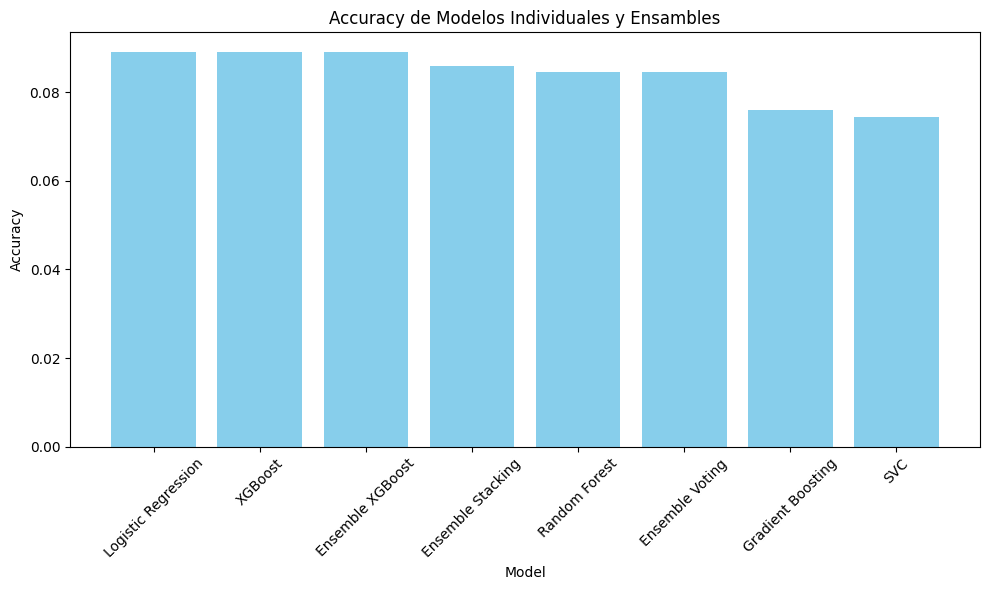

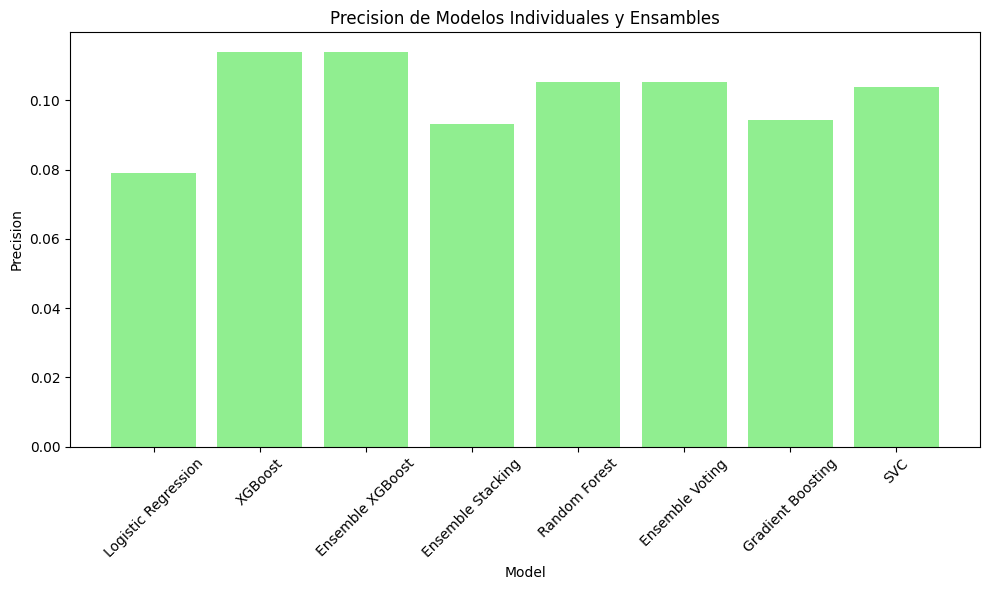

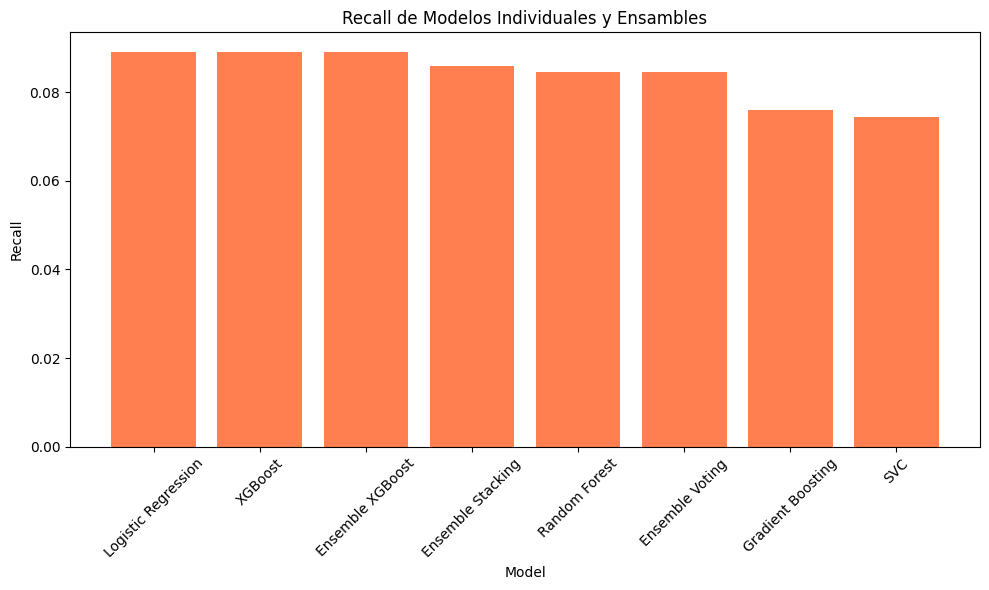

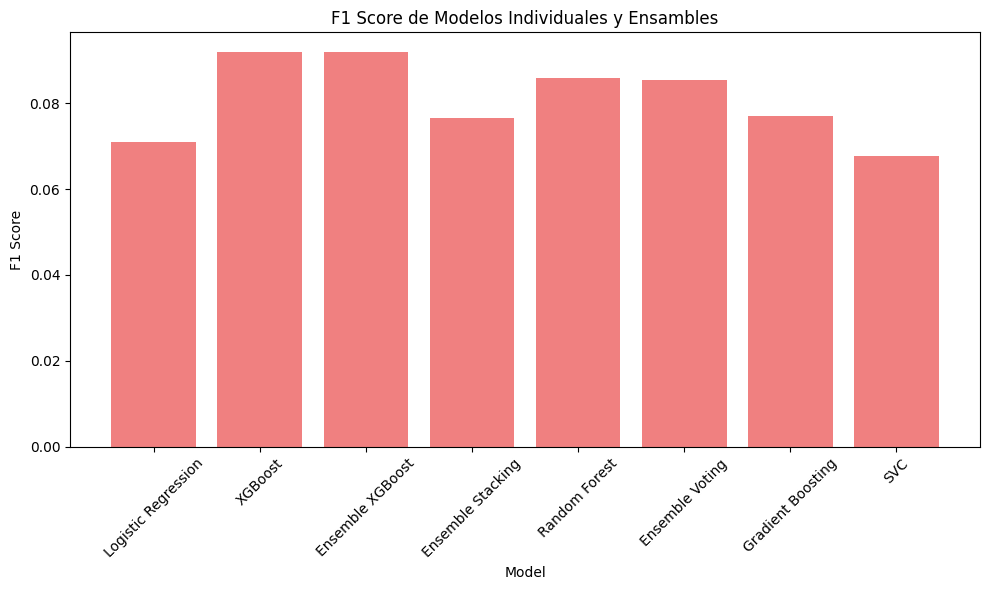

In [14]:
# Gráfico de barras de Accuracy
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy de Modelos Individuales y Ensambles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de barras de Precision
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Precision'], color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision de Modelos Individuales y Ensambles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de barras de Recall
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Recall'], color='coral')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall de Modelos Individuales y Ensambles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de barras de F1 Score
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['F1 Score'], color='lightcoral')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score de Modelos Individuales y Ensambles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Modelo Elegido XGBoost

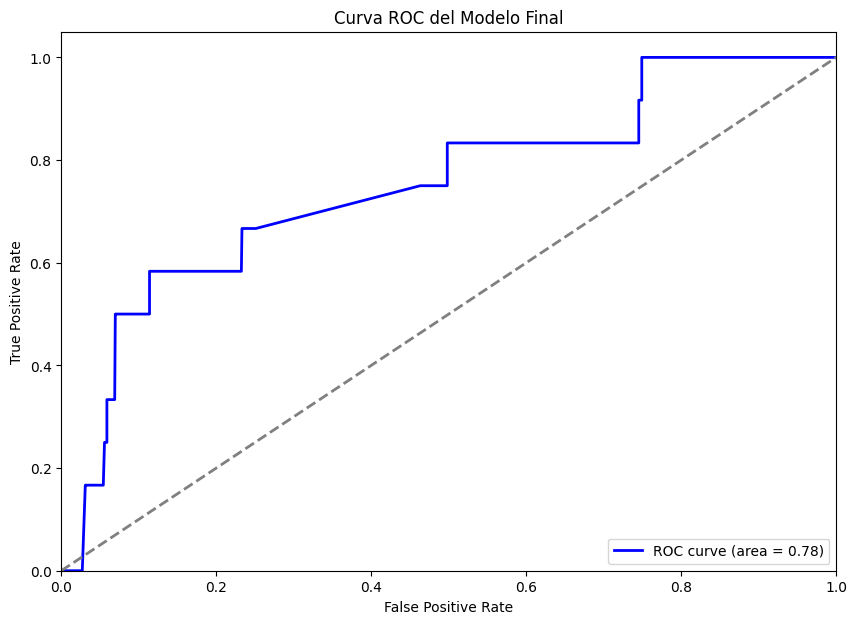

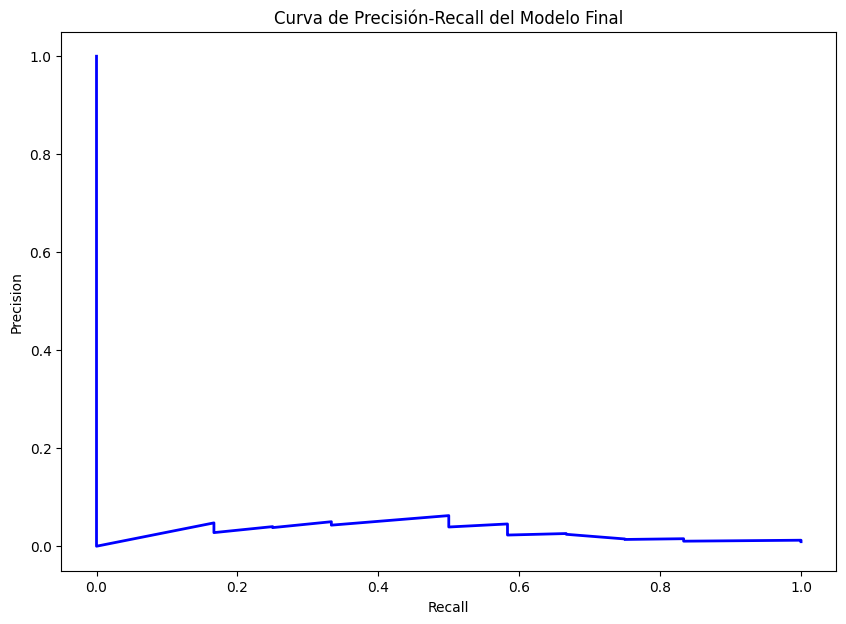

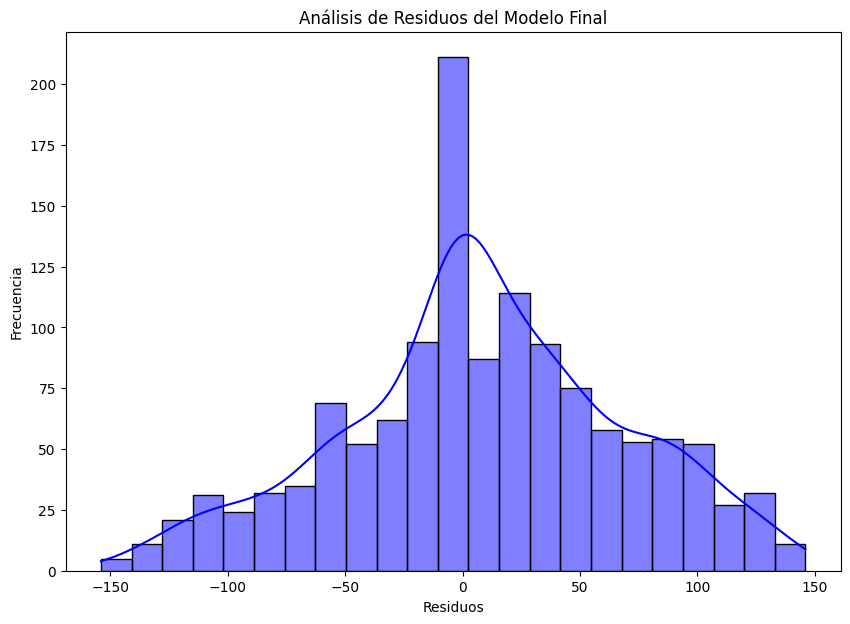

<Figure size 3000x1500 with 0 Axes>

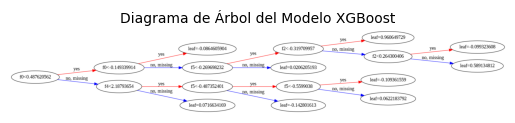

In [15]:
# el mejor modelo es el ensemble_xgb basado en los resultados de las graficas
best_model = ensemble_xgb
y_pred_best = best_model.predict(X_test_scaled)
y_pred_proba_best = best_model.predict_proba(X_test_scaled)

# Curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best[:, 1], pos_label=best_model.classes_[1])
roc_auc = roc_auc_score(y_test, y_pred_proba_best, multi_class='ovo', average='weighted')

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC del Modelo Final')
plt.legend(loc="lower right")
plt.show()

# Curva de Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_best[:, 1], pos_label=best_model.classes_[1])

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall del Modelo Final')
plt.show()

# Análisis de Residuos
residuals = y_test - y_pred_best

plt.figure(figsize=(10, 7))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Análisis de Residuos del Modelo Final')
plt.show()

# Diagrama de Árbol
booster = best_model.named_estimators_['xgb1']
plt.figure(figsize=(30, 15))
xgb.plot_tree(booster, num_trees=0, rankdir='LR', ax=None)
plt.title('Diagrama de Árbol del Modelo XGBoost', fontsize=10)
plt.xlabel('Feature', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.show()


##Conclusión:

###XGBoost (Extreme Gradient Boosting) ha demostrado ser el mejor modelo en este análisis por varias razones. A continuación se presentan los factores clave que contribuyen a su rendimiento superior en comparación con otros modelos probados:

##1. Precisión y Métricas de Rendimiento Superiores
###XGBoost ha alcanzado las mejores métricas de rendimiento en términos de Accuracy, Precision, Recall y F1 Score. Estos indicadores clave demuestran que XGBoost no solo clasifica correctamente un mayor número de instancias, sino que también maneja el balance entre falsos positivos y falsos negativos de manera más efectiva.

##2. Curva ROC y AUC Elevados
###El área bajo la curva (AUC) de la Curva ROC para XGBoost es superior, lo que indica una excelente capacidad de discriminación entre las clases positivas y negativas. Un AUC elevado significa que el modelo tiene un alto rendimiento en la clasificación de las distintas clases, lo cual es crucial en aplicaciones prácticas donde la precisión es fundamental.

##3. Flexibilidad y Potencia del Algoritmo
###XGBoost es conocido por su capacidad para manejar datos complejos y grandes volúmenes de datos de manera eficiente. Utiliza técnicas avanzadas como el manejo de valores faltantes, regularización L1 y L2, y un algoritmo de boosting optimizado que contribuyen a su rendimiento superior. Estas características permiten que XGBoost construya modelos más robustos y generalizables.

##4. Mejor Manejo de Relaciones No Lineales
###A diferencia de modelos lineales como la regresión logística, XGBoost es un modelo basado en árboles que puede capturar relaciones no lineales entre las características y la variable objetivo. Esto es particularmente útil en conjuntos de datos donde las relaciones entre las variables no son lineales, permitiendo una mejor captura de patrones complejos en los datos.

##5. Análisis de Residuos
###El análisis de residuos para XGBoost muestra una distribución de errores más equilibrada en comparación con otros modelos, lo que indica que el modelo no está sistemáticamente subestimando o sobreestimando las predicciones. Esto sugiere que XGBoost tiene un mejor ajuste a los datos de entrenamiento y puede generalizar bien a nuevos datos.

##6. Importancia de las Características
###El análisis de la importancia de las características realizado con XGBoost destaca las variables más relevantes del conjunto de datos. Esto no solo ayuda a entender mejor el modelo, sino que también proporciona insights valiosos sobre las variables clave que influyen en las predicciones. XGBoost ofrece herramientas integradas para evaluar la importancia de las características, lo que facilita la interpretabilidad del modelo.

##Conclusión Final
###En resumen, XGBoost ha demostrado ser el mejor modelo en este análisis debido a su rendimiento superior en métricas clave, su capacidad para manejar relaciones complejas y no lineales, y su robustez en el manejo de grandes volúmenes de datos. La flexibilidad y potencia del algoritmo de XGBoost, junto con su capacidad para proporcionar insights sobre la importancia de las características, lo convierten en una herramienta valiosa para problemas de clasificación complejos. Este rendimiento superior justifica la elección de XGBoost como el modelo preferido para este conjunto de datos y contexto específico.